In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = yf.download('HINDALCO.NS', start='2014-01-24', end='2018-12-29')

[*********************100%***********************]  1 of 1 completed


In [18]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-24,113.150002,115.349998,113.000000,114.000000,108.693268,5737135
2014-01-27,112.000000,112.699997,109.300003,111.099998,105.928268,8724577
2014-01-28,110.000000,115.000000,109.750000,113.800003,108.502594,4513345
2014-01-29,114.500000,114.750000,111.150002,111.750000,106.548012,4713458
2014-01-30,110.199997,110.699997,107.599998,108.099998,103.067924,5077231
...,...,...,...,...,...,...
2018-12-21,224.250000,227.449997,221.800003,224.000000,221.340958,6933691
2018-12-24,224.000000,224.000000,216.949997,217.850006,215.263992,4667022
2018-12-26,213.850006,219.800003,212.899994,218.600006,216.005081,6554865


In [21]:
df['MA50'] = df['Adj Close'].rolling(50).mean()
df['MA200'] = df['Adj Close'].rolling(200).mean()

In [22]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50,MA200
Date,,,,,,,,,
2014-01-24,113.150002,115.349998,113.000000,114.000000,108.693268,5737135,NaN,NaN,NaN
2014-01-27,112.000000,112.699997,109.300003,111.099998,105.928268,8724577,NaN,NaN,NaN
2014-01-28,110.000000,115.000000,109.750000,113.800003,108.502594,4513345,NaN,NaN,NaN
2014-01-29,114.500000,114.750000,111.150002,111.750000,106.548012,4713458,NaN,NaN,NaN
2014-01-30,110.199997,110.699997,107.599998,108.099998,103.067924,5077231,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-12-21,224.250000,227.449997,221.800003,224.000000,221.340958,6933691,219.935352,223.615642,224.864451
2018-12-24,224.000000,224.000000,216.949997,217.850006,215.263992,4667022,219.888416,223.436791,224.757227
2018-12-26,213.850006,219.800003,212.899994,218.600006,216.005081,6554865,219.824189,223.478293,224.708758


In [23]:
df = df.dropna()

In [24]:
df = df[['Adj Close','MA50','MA200']]

In [25]:
df

,Adj Close,MA50,MA200
Date,,,
2014-11-21,153.754837,150.486742,143.097064
2014-11-24,158.886383,150.432275,143.348030
2014-11-25,158.790482,150.410215,143.612341
2014-11-26,162.243484,150.327726,143.881045
2014-11-27,165.552628,150.321971,144.176068
...,...,...,...
2018-12-21,221.340958,223.615642,224.864451
2018-12-24,215.263992,223.436791,224.757227
2018-12-26,216.005081,223.478293,224.708758


In [26]:
Buy = []
Sell = []


for i in range(len(df)):
    if df.MA50.iloc[i] > df.MA200.iloc[i] \
    and df.MA50.iloc[i-1] < df.MA200.iloc[i-1]:
        Buy.append(i)
    elif df.MA50.iloc[i] < df.MA200.iloc[i] \
    and df.MA50.iloc[i-1] > df.MA200.iloc[i-1]:
        Sell.append(i)
    

In [27]:
Buy

[0, 29, 352, 973]

In [28]:
Sell

[26, 32, 828, 1002]

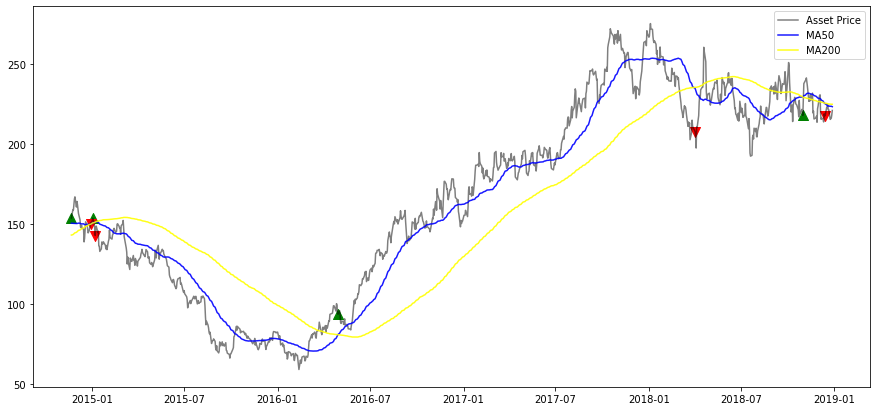

In [29]:
plt.figure(figsize=(15,7))
plt.plot(df['Adj Close'], label='Asset Price', c='black', alpha=0.5)
plt.plot(df['MA50'], label='MA50', c='blue', alpha=0.9)
plt.plot(df['MA200'], label='MA200', c='yellow', alpha=0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Adj Close'], marker='^', color='g', s=100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Adj Close'], marker='v', color='r', s=100)
plt.legend()
plt.show()